

```
Practica 10: Diseño de Filtros con Respuesta Infinita al Impulso (IIR) 
Laboratorio: Procesamiento Digital de señales
Harold Adrián Gómez Gil
```

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio
from scipy.io.wavfile import read # libreria para lectura de archivos de audio
import scipy.signal as sp


<h1>1.Procedimiento </h1>

<h2>1.1 Diseño señal sinusoidal con incrementos de frecuencia de forma cuadratica. </h2>

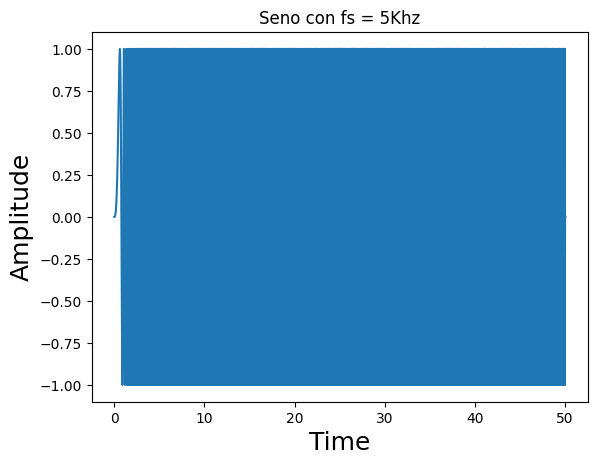

In [3]:
fs=5e3 #Frecuencia muestreo
f=1 #Frecuencia de la señal

t= np.arange(0,50,1/fs) #Vector de tiempo
f=t*t 
x= np.sin(2*np.pi*f*t) #Señal seno
plt.plot(t , x )
plt.title('Seno con fs = 5Khz')
plt.xlabel('Time',fontsize=18) # Etiqueta eje X
plt.ylabel('Amplitude',fontsize=18) # Etiqueta eje Y
Audio(x, rate=fs)


<p>En lo que respecta al audio de la señal sseno, con la frecuencia lo que pasa es que a medida que está aumentando, 
    hace que el sonido alcance valores en los cuales puede ser audible para el oido humano, por otro lado,
     a medida que esté valor va a aumentando más y más, el valor de esta frecuencia comienza a alcanzar valores en los cuales deja de ser detectable al oido.  </p>

<h2>1.2 Antes y después del  filtro IIR </h2>

In [4]:
import scipy.signal as sp
fs= 5000
f = 2000


# Filtrado de la señal pasa bajas 
Wn_pasa_baja= 1300/f 
b, a = sp.butter(6, Wn_pasa_baja, btype='low', analog=False, output='ba', fs=None)
wb, Hb = sp.freqz(b, a);
y = sp.lfilter(b, a, x)

# Filtrado de la señal pasa altas 
Wn_pasa_alta = 1200/f 
b, a  = sp.butter (6, Wn_pasa_alta, btype='highpass', analog=False, output='ba', fs=None) 
wb, Hb  = sp.freqz (b, a); 
y_pasa_alta = sp.lfilter (b, a, x) 


# Filtrado de la señal pasa bandas

Wn_pasa_banda_1 = 600/f 
Wn_pasa_banda_2 = 1800/f 
b, a  = sp.butter (6, [Wn_pasa_banda_1, Wn_pasa_banda_2], btype='bandpass', analog=False, output='ba', fs=None) 
wb, Hb  = sp.freqz (b, a); 
y_pasa_banda = sp.lfilter (b, a, x) 

# Filtrado de la señal rechaza bandas 
Wn_rechaza_banda_1 = 600/f 
Wn_rechaza_banda_2 = 1800/f 
b, a  = sp.butter (6, [Wn_rechaza_banda_1, Wn_rechaza_banda_2], btype='bandstop', analog=False, output='ba', fs=None) 
wb, Hb  = sp.freqz (b, a); 
y_rechaza_banda = sp.lfilter (b, a, x) 

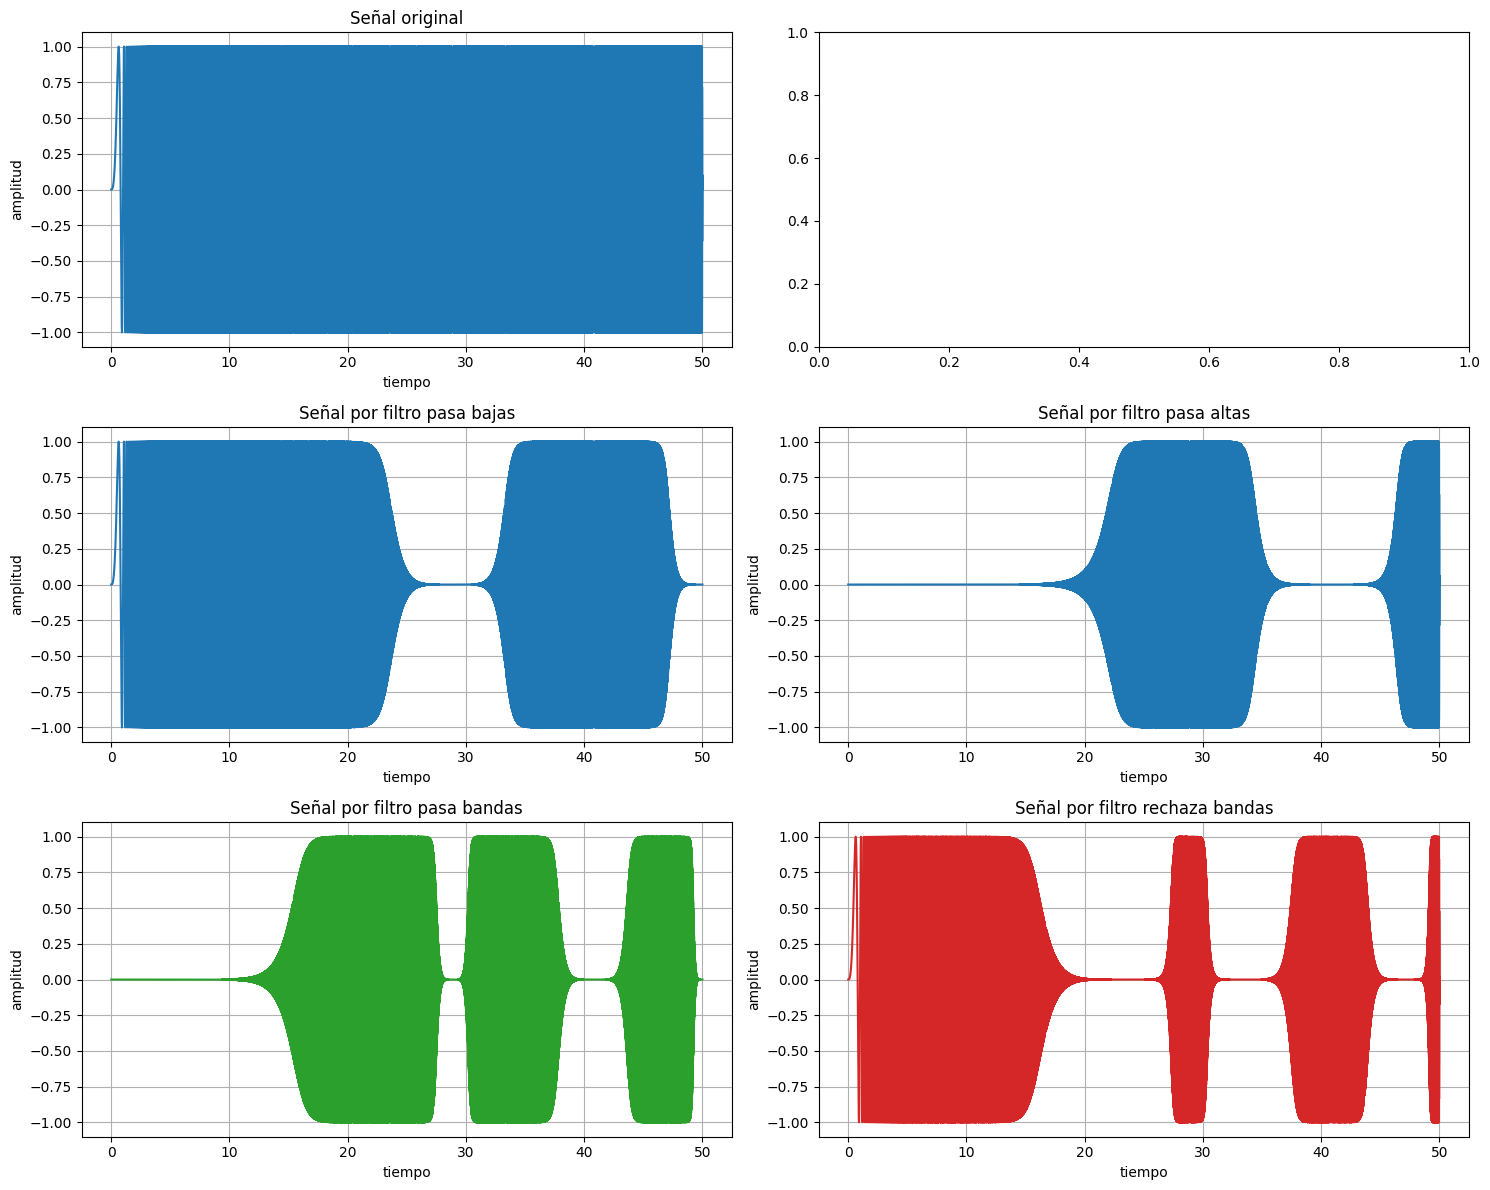

In [5]:
fig, axs = plt.subplots(3,2, figsize = (15,12))

# Señal original
axs[0,0].plot(t, x)
axs[0,0].set_xlabel('tiempo')
axs[0,0].set_ylabel('amplitud')
axs[0,0].set_title('Señal original')

# Filtro pasa bajas
axs[1,0].plot(t,y)
axs[1,0].set_xlabel('tiempo')
axs[1,0].set_ylabel('amplitud')
axs[1,0].set_title('Señal por filtro pasa bajas')

# Filtro pasa altas
axs[1,1].plot(t,y_pasa_alta)
axs[1,1].set_xlabel('tiempo')
axs[1,1].set_ylabel('amplitud')
axs[1,1].set_title('Señal por filtro pasa altas')

# Filtro pasa bandas
axs[2,0].plot(t,y_pasa_banda,'tab:green')
axs[2,0].set_xlabel('tiempo')
axs[2,0].set_ylabel('amplitud')
axs[2,0].set_title('Señal por filtro pasa bandas')

# Filtro rechaza bandas
axs[2,1].plot(t,y_rechaza_banda,'tab:red')
axs[2,1].set_xlabel('tiempo')
axs[2,1].set_ylabel('amplitud')
axs[2,1].set_title('Señal por filtro rechaza bandas')

axs[0,0].grid()
axs[1,0].grid()
axs[1,1].grid()
axs[2,0].grid()
axs[2,1].grid()

fig.tight_layout()

<p>Cómo se puede ver en cada uno de los plots, cuando se está filtrando para cada uno de los tipos se tienen comportamientos esperados, como lo es dejar pasar todas las frecuencias, atenuar solo las bajas o las altas etc. </p>
<p>Además en el vector de tiempos, hay que tener en cuenta que normalmente cuando se está trabajando en dominio de la frecuencia, se espera que el dato que se espera vaya de 0 a pi, y que hay prestar atención a la causalidad de los filtros etc </p>

<h1>2.Filtrado de música con IIR</h1>

<h2>2.1 Lectura de audio y grafica</h2>

C:\Users\Asus\AppData\Local\Temp\ipykernel_18652\4195360604.py:2: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs ,x =  read(audio) # leo el archivo


44100


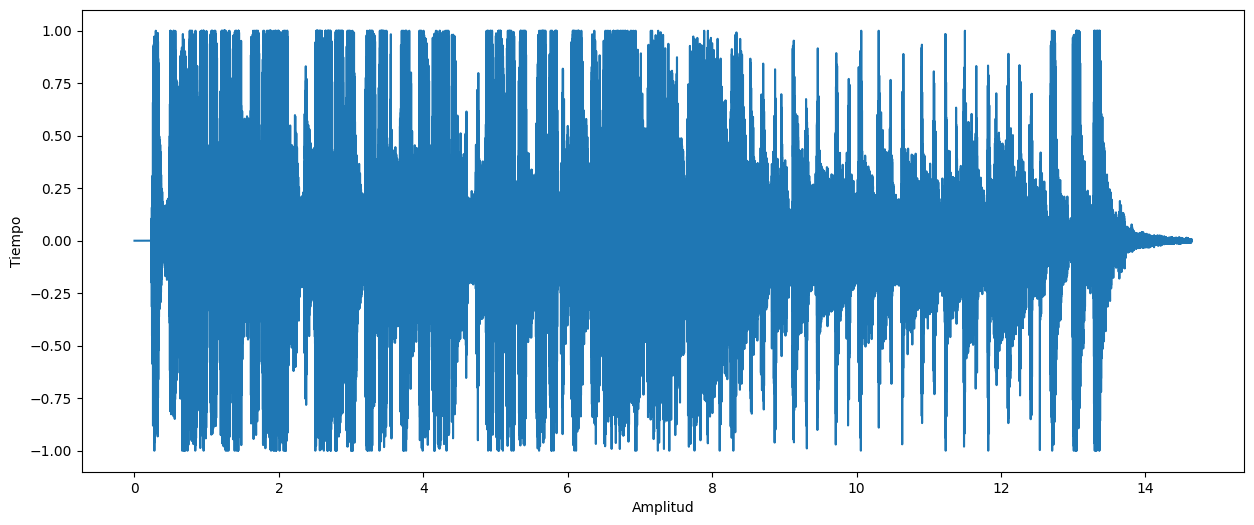

In [6]:
audio =('audio2.wav')
fs ,x =  read(audio) # leo el archivo
print(fs)
x = x/float(max(abs(x)))  # normalizo entre 0 y 1
time = np.arange(0,float(len(x))/fs, 1.0/fs) # vector de tiempo

plt.figure(figsize=(15,6))
plt.plot(time,x)
plt.ylabel("Tiempo")
plt.xlabel("Amplitud")
plt.show()
Audio(x, rate=fs) # para escuchar la senal, si se desea

<h2>2.2  Diseño de filtro IIR (Pasa Altas).</h2>

In [7]:
fc1= 200/(fs/2)
fc2= 700/(fs/2)
fc3 = 20000/(fs/2)

b, a = sp.butter(6, fc1, btype='high', analog=False, output='ba', fs=None)
wb, Hb = sp.freqz(b, a, 1024)
y_fc1 = sp.lfilter(b, a, x)


b, a = sp.butter(6, fc2, btype='high', analog=False, output='ba', fs=None)
wb, Hb = sp.freqz(b, a, 1024)
y_fc2 = sp.lfilter(b, a, x)

b, a = sp.butter(6, fc3, btype='high', analog=False, output='ba', fs=None)
wb, Hb = sp.freqz(b, a, 1024)
y_fc3 = sp.lfilter(b, a, x)

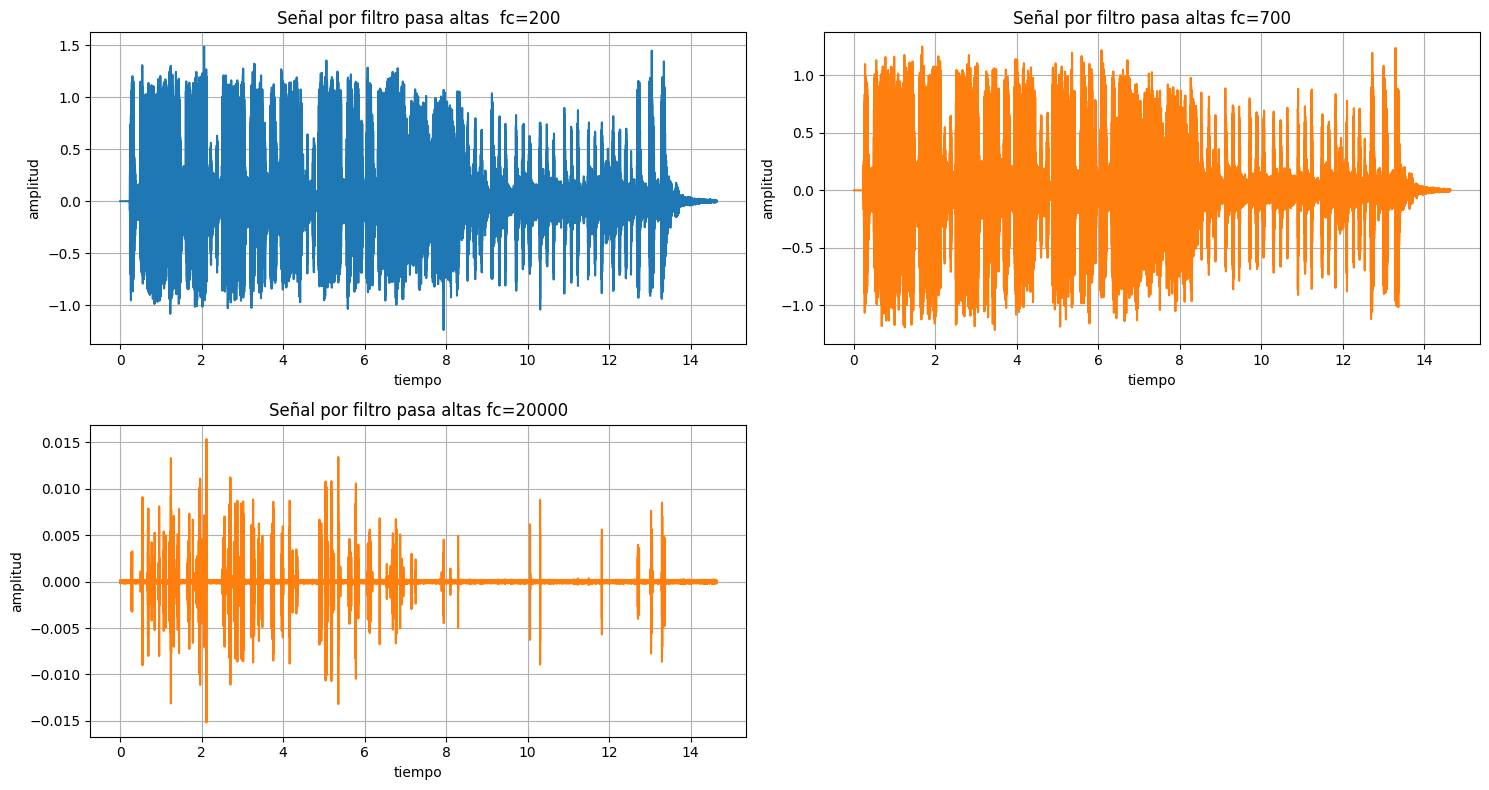

In [8]:
fig, axs = plt.subplots(2, 2, figsize = (15,8))

# Filtro pasa altas  fc1 =  200
axs[0,0].plot(time,y_fc1)
axs[0,0].set_xlabel('tiempo')
axs[0,0].set_ylabel('amplitud')
axs[0,0].set_title('Señal por filtro pasa altas  fc=200')

# Filtro pasa altas  fc2 =  700
axs[0,1].plot(time,y_fc2,'tab:orange')
axs[0,1].set_xlabel('tiempo')
axs[0,1].set_ylabel('amplitud')
axs[0,1].set_title('Señal por filtro pasa altas fc=700')

# Filtro pasa altas  fc3 =  20000
axs[1,0].plot(time,y_fc3,'tab:orange')
axs[1,0].set_xlabel('tiempo')
axs[1,0].set_ylabel('amplitud')
axs[1,0].set_title('Señal por filtro pasa altas fc=20000')

# Eliminar la subtrama vacía
fig.delaxes(axs[1,1])

axs[0,0].grid()
axs[0,1].grid()
axs[1,0].grid()

fig.tight_layout()

In [9]:
Audio(y_fc1, rate=fs) # para escuchar la senal, si se desea

<p>Al escuchar el audio con este filtrado se percibe muy levemente uno de los instrumentos aunque capaz y puede ser ruido extraño que se filtra en esa frecuencia</p>

In [10]:
Audio(y_fc2, rate=fs) # para escuchar la senal, si se desea


<p>En este punto se hace mucho más perceptible el sonido de las altas frecuencias como son en este caso las trompetas de la pista</p>

In [11]:
Audio(y_fc3, rate=fs) # para escuchar la senal, si se desea


<p>Y para este valor de frecuencia se tiene el mismo comportamiento del primer filtrado, en donde suena lo que puede ser o ruido o una especie maracas o carrasca</p>

<p>En general los instrumentos que dejan de aparecer en los audios, tienen que ver con las frecuencias de corte que se están imponiendo en cada filtro diseñado.</p>

<h2>2.5 Dos filtros pasa bajas con Frecuencias de corte: 700hz y diferente rollOff a los trabajados anteriormente</h2>

In [12]:
# Filtro 1
fc= 700/(fs/2)

b, a = sp.butter(9, fc, btype='low', analog=False, output='ba', fs=None)
wb, Hb = sp.freqz(b, a, 1024);
y_fc1 = sp.lfilter(b, a, x)

# Filtro 2
b, a = sp.butter(3, fc, btype='low', analog=False, output='ba', fs=None)
wb, Hb = sp.freqz(b, a, 1024);
y_fc2 = sp.lfilter(b, a, x)

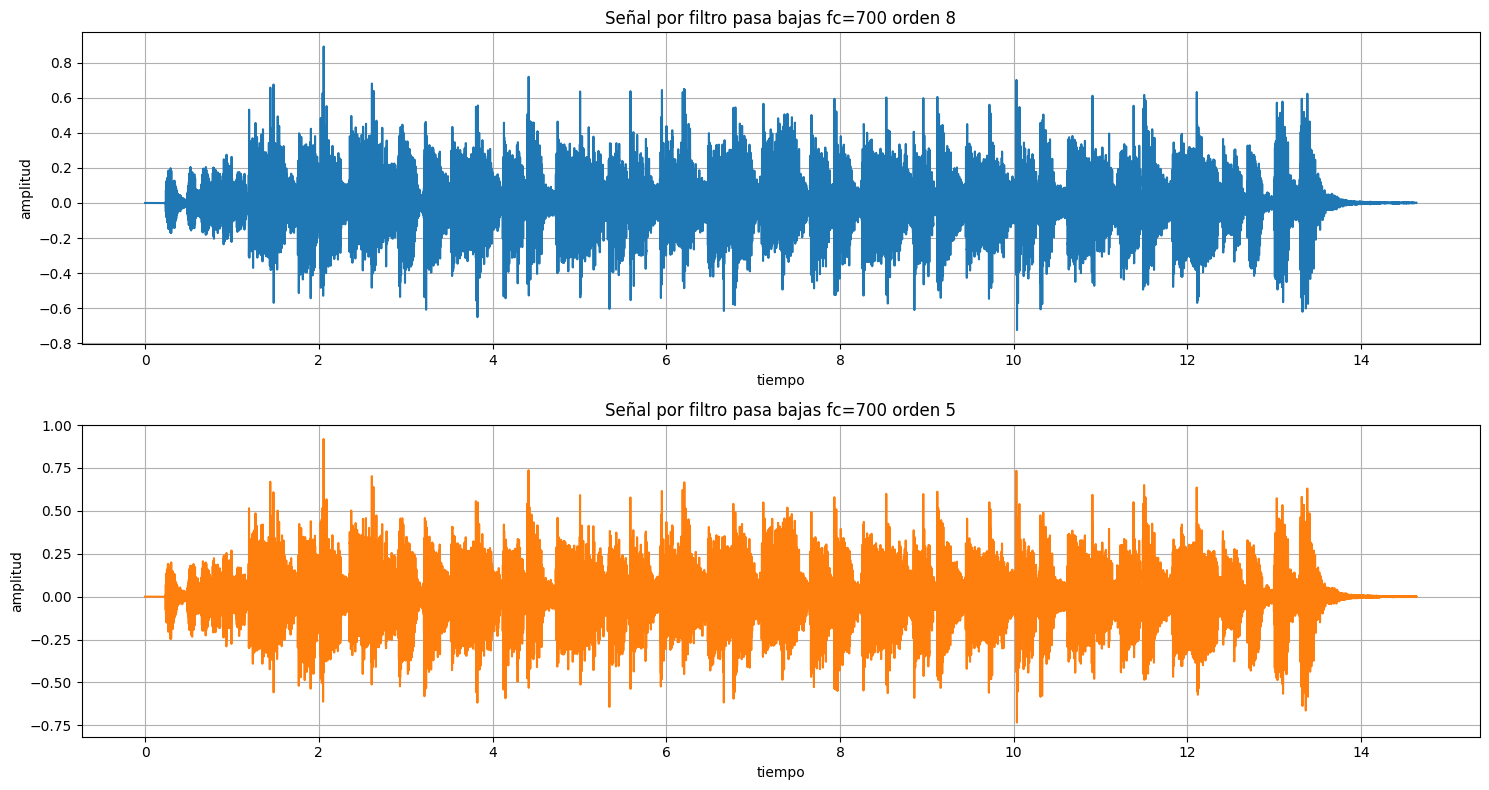

In [13]:
fig, axs = plt.subplots(2 ,figsize = (15,8))


# Filtro pasa bajas  fc1 =  700
axs[0].plot(time,y_fc1)
axs[0].set_xlabel('tiempo')
axs[0].set_ylabel('amplitud')
axs[0].set_title('Señal por filtro pasa bajas fc=700 orden 8')


# Filtro pasa bajas  fc2 =  700
axs[1].plot(time,y_fc2,'tab:orange')
axs[1].set_xlabel('tiempo')
axs[1].set_ylabel('amplitud')
axs[1].set_title('Señal por filtro pasa bajas fc=700 orden 5')

axs[0].grid()
axs[1].grid()


fig.tight_layout()

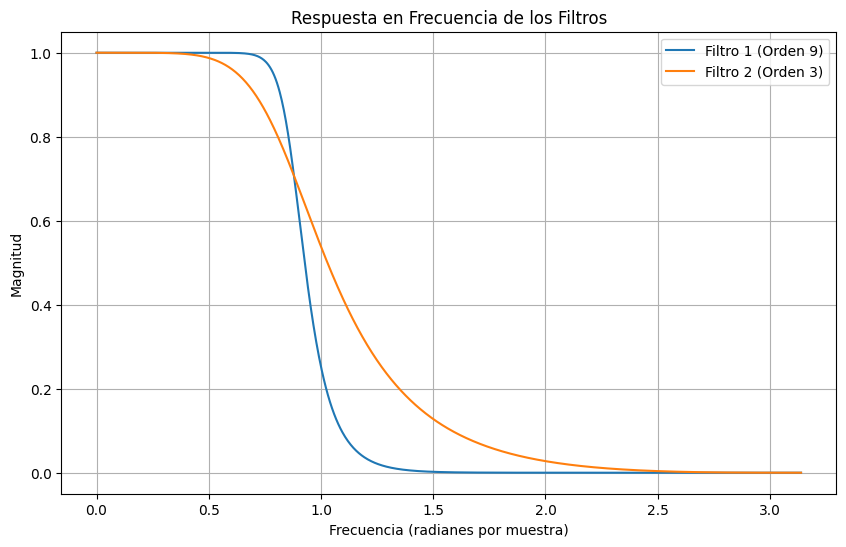

In [14]:


# Frecuencia de muestreo (fs)
fs = 5000

# Frecuencia de corte (fc)
fc = 700 / (fs/2)

# Crear los coeficientes del filtro 1 (orden 9)
b1, a1 = sp.butter(9, fc, btype='low', analog=False, output='ba', fs=None)

# Respuesta en frecuencia del filtro 1
w1, H1 = sp.freqz(b1, a1, 1024)

# Crear los coeficientes del filtro 2 (orden 3)
b2, a2 = sp.butter(3, fc, btype='low', analog=False, output='ba', fs=None)

# Respuesta en frecuencia del filtro 2
w2, H2 = sp.freqz(b2, a2, 1024)

# Gráfica de la magnitud de la respuesta en frecuencia
plt.figure(figsize=(10, 6))
plt.plot(w1, abs(H1), label='Filtro 1 (Orden 9)')
plt.plot(w2, abs(H2), label='Filtro 2 (Orden 3)')
plt.xlabel('Frecuencia (radianes por muestra)')
plt.ylabel('Magnitud')
plt.title('Respuesta en Frecuencia de los Filtros')
plt.legend()
plt.grid(True)
plt.show()


<lo><p>Como pude verse en las graficas de frecuencia y el tiempo, queda mucho más complejo analizar el comportamiento del filtro en el tiempo, sin embargo, cuando se pasa a la frecuencia, el comportamiento indica que con un filtro de un mayor orden, lo cual se traduce en su rollOff (que tan rápido se atenua), se tiene que para ordenes mayores el comportamiento será mucho más cercano al "Rectangulo" ideal que se quiere para llevar a cabo un filtrado ideal. A menor orden, más se demorará la señal en atenuarse.</p></lo>

<lo><p>El parametro que se cambió en la función fue el primero, que corresponde al orden del filtro</p></lo>

<h2>2.6 Comparación FIR Vs IIR</h2>

9


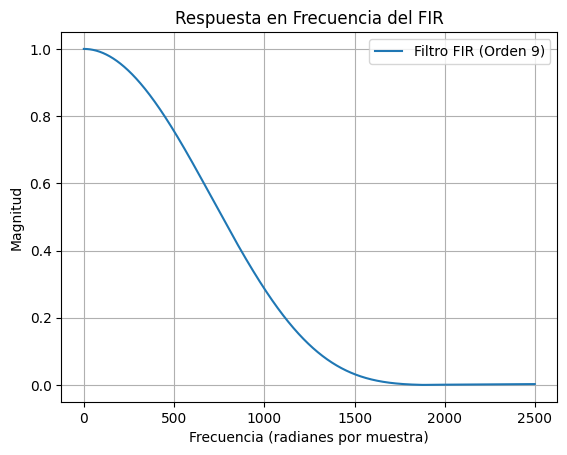

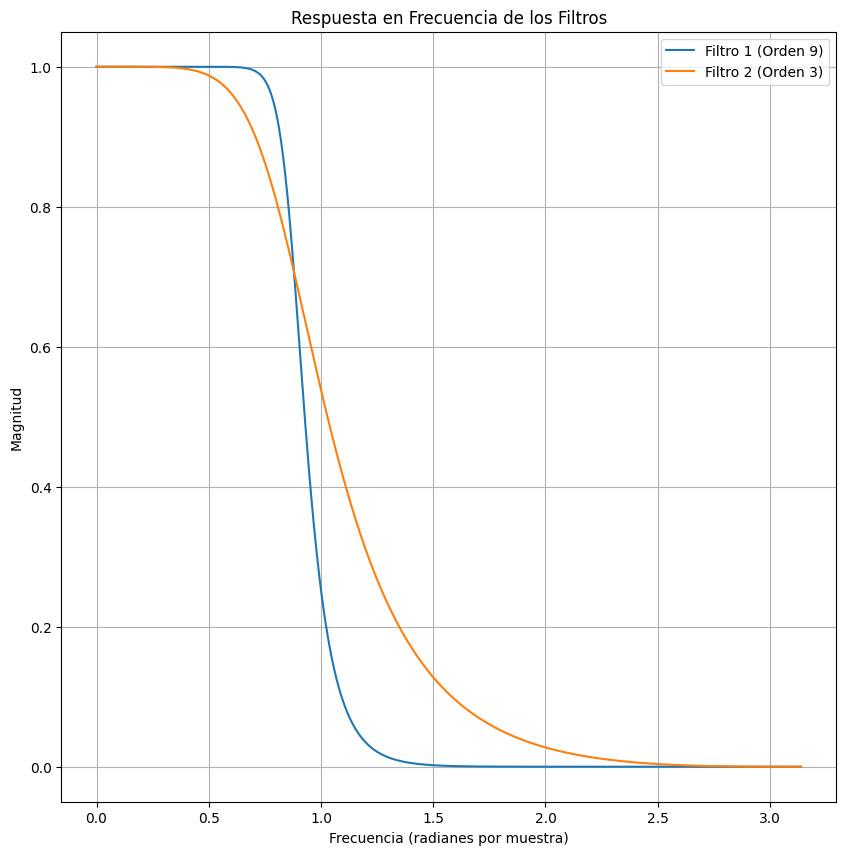

In [41]:
from scipy.signal import kaiserord, firwin 
import scipy.signal as signal


nyq_rate = fs / 2.0  # frecuencia de muestreso FS <= 2*fax
roll_off = 2300.0  # Banda de transicion
cutoff_hz = 700.0 #frecuencia de corte
width = roll_off/nyq_rate
ripple_db = 60.0 #The desired attenuation in the stop band, in dB.
N,_ = kaiserord(ripple_db, width) # Compute the order and Kaiser parameter for the FIR filter.
print(N)
taps = firwin(N, cutoff_hz/nyq_rate, pass_zero=True)
w, h = signal.freqz(taps, [1], worN=2000)


plt.plot(nyq_rate*w/np.pi, abs(h), label='Filtro FIR (Orden 9)')
plt.xlabel('Frecuencia (radianes por muestra)')
plt.ylabel('Magnitud')
plt.title('Respuesta en Frecuencia del FIR')
plt.legend()
plt.grid(True)

# Gráfica de la magnitud de la respuesta en frecuencia
plt.figure(figsize=(10, 10))
plt.plot(w1, abs(H1), label='Filtro 1 (Orden 9)')
plt.plot(w2, abs(H2), label='Filtro 2 (Orden 3)')

plt.xlabel('Frecuencia (radianes por muestra)')
plt.ylabel('Magnitud')
plt.title('Respuesta en Frecuencia de los Filtros')
plt.legend()
plt.grid(True)
plt.show()


<lo>
<p>Entre los filtros, cuando se está usando el filtro IIR, el orden del filtro es pequeño, mientras que cuando se usa el FIR cuando sebusca el orden del filtro igual al IIR, se tiene una banda de transición de 2500 . </p></lo>

<lo><p>A medida que se quiere obtener una igualdad en el orden de los filtros, cuando en IIR se tiene un valor pequeño, su equivalente en FIR se obtiene aumentando considerablemente la banda de transición</p></lo>

<h1>CONCLUSIONES</h1>

<p><li>Si bien los filtros IIR no son realizables en la realidad, sirven como base para realizar el diseño de un filtro FIR, teniendo en cuenta a lo que se dijo anteriormente con respecto al orden de estos</li>
<li>Uno de los problemas fundamentales en el diseño de filtros IIR es garantizar que el filtro sea estable, es decir, que su respuesta al impulso no se dispare infinitamente en el tiempo. El diseño de filtros IIR estables puede requerir técnicas específicas para garantizar que los polinomios de la función de transferencia tengan todas sus raíces dentro del círculo unitario en el plano Z (en el caso de filtros digitales).</li>

<li> Los filtros FIR generalmente requieren más coeficientes para lograr una respuesta en frecuencia deseada en comparación con los filtros IIR. Esto puede requerir más recursos computacionales, tal y como se vio en los incisos anteriores y como se menciona en la primer conclusión, en donde según sea el orden del filtro se va a requerir mayor o menor banda de atenuación.</li>




</p>